<a href="https://akademie.datamics.com/kursliste/">![title](bg_datamics_top.png)</a>

<center><em>© Datamics</em></center><br><center><em>Besuche uns für mehr Informationen auf <a href='https://akademie.datamics.com/kursliste/'>www.akademie.datamics.com</a></em></center>

# Kapitalgutpreismodell: CAPM - Capital Asset Pricing Model

Schau dir das Video an, um eine komplette Übersicht zu bekommen.

Portfolio Rendite:

## $r_p(t) = \sum\limits_{i}^{n}w_i r_i(t)$

Marktgewichte:

## $ w_i = \frac{MarketCap_i}{\sum_{j}^{n}{MarketCap_j}} $


### CAPM eines Portfolios


## $ r_p(t) = \beta_pr_m(t) + \sum\limits_{i}^{n}w_i \alpha_i(t)$

In [87]:
# Modelliere CAPM als einfache lineare Regression

In [28]:
from scipy import stats

In [89]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.  In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    
    Returns
    -------
    slope : float
        Slope of the regression line.
    intercept : float
        Intercept of the regression line.
    rvalue : float
        Correlation coefficient.
    pvalue : float
        Two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, 

In [1]:
import pandas as pd

Umgehen einer Fehlermeldung da sich die Methode **is_list_like** verschoben hat. Das sollte ab **pandas_datareader** Version 0.7 wieder ohne den Fix funktionieren:

In [2]:
pd.core.common.is_list_like = pd.api.types.is_list_like

In [3]:
import pandas_datareader as web

In [4]:
spy_etf = web.DataReader('SPY','stooq','2013-08-01','2018-08-01')

In [5]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2018-08-01 to 2013-08-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1260 non-null   float64
 1   High    1260 non-null   float64
 2   Low     1260 non-null   float64
 3   Close   1260 non-null   float64
 4   Volume  1260 non-null   float64
dtypes: float64(5)
memory usage: 59.1 KB


In [6]:
spy_etf.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-08-01,261.903,262.409,260.565,261.239,5.789852e+07
2018-07-31,261.189,262.300,260.783,261.705,7.372116e+07
2018-07-30,261.864,262.002,259.821,260.396,6.853052e+07
2018-07-27,263.886,263.986,260.783,261.784,8.255074e+07
2018-07-26,263.420,264.254,263.312,263.560,6.227011e+07


In [7]:
start = pd.to_datetime('2013-08-01')
end = pd.to_datetime('2018-08-01')

In [8]:
aapl = web.DataReader('AAPL','stooq',start,end)

In [9]:
aapl.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-08-01,47.7164,48.3435,47.2748,48.2857,2.835208e+08
2018-07-31,45.5980,46.0365,45.3656,45.5950,1.643182e+08
2018-07-30,45.9827,46.0485,45.3019,45.5042,8.776400e+07
2018-07-27,46.7205,46.7703,45.5510,45.7664,1.002609e+08
2018-07-26,46.6317,46.9568,46.3934,46.5380,7.961103e+07


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

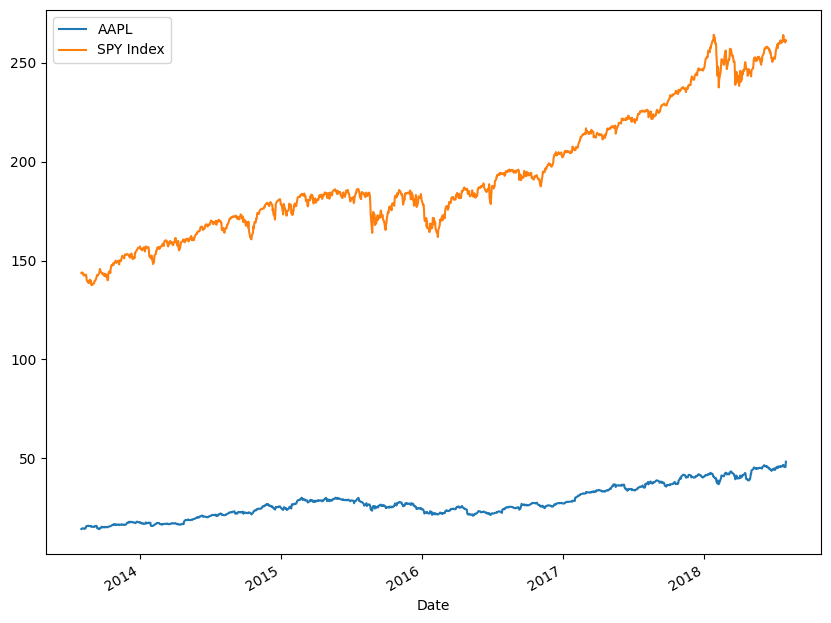

In [11]:
aapl['Close'].plot(label='AAPL',figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

## Vergleiche Gesamtrendite

In [14]:
aapl['Cumulative']    = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

Text(0.5, 1.0, 'Cumulative Return')

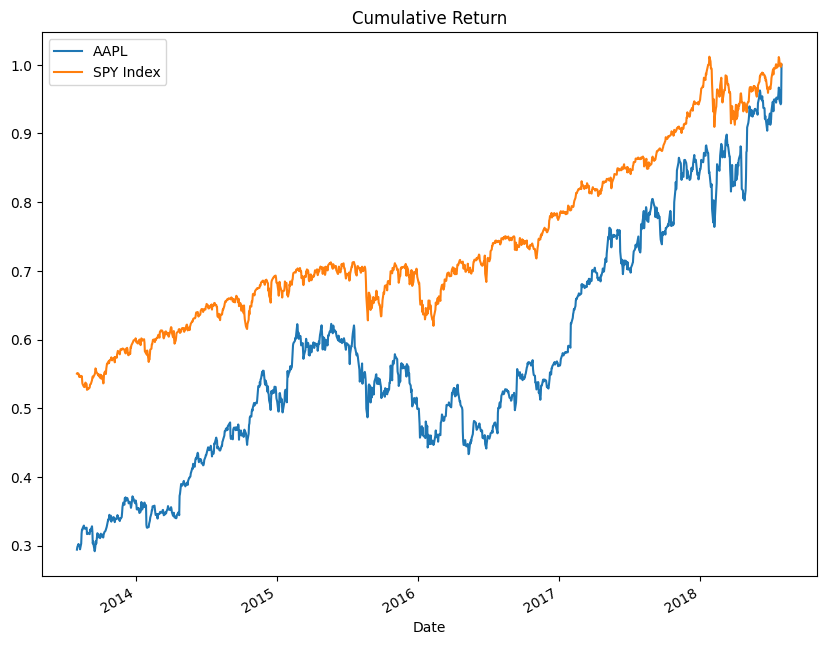

In [15]:
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY Index')
plt.legend()
plt.title('Cumulative Return')

## Erfasse Tägliche Rendite

In [16]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

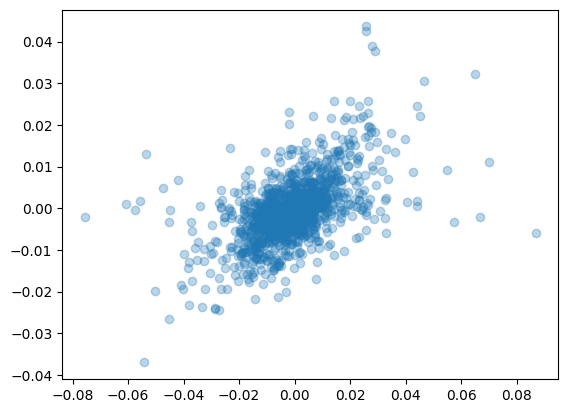

In [17]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.3)

<AxesSubplot: >

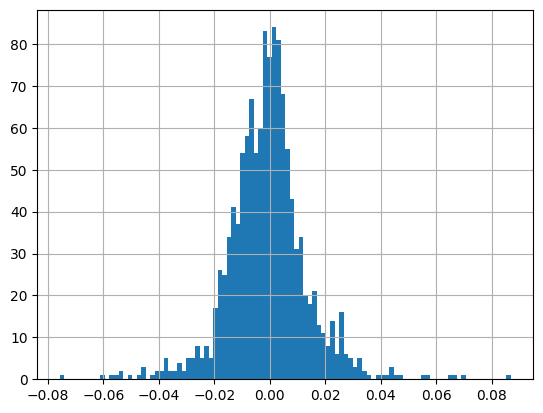

In [18]:
aapl['Daily Return'].hist(bins=100)

<AxesSubplot: >

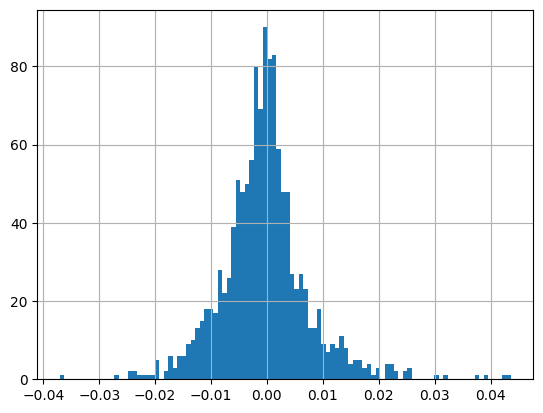

In [19]:
spy_etf['Daily Return'].hist(bins=100)

In [107]:
# Fit a model on 'aapl['Daily Return']' & 'spy_etf['Daily Return']' (see Scatterplot)
# --> Get estimates for alpha & beta in the CAMP-Formula  
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

In [108]:
beta

0.36534999112239863

In [109]:
alpha

-0.00015656561979832231

In [110]:
r_value

0.6730232133754229

## Was wenn unsere Aktie vollständig mit SP500 verbunden wäre?

In [20]:
spy_etf['Daily Return'].head()

Date
2018-08-01         NaN
2018-07-31    0.001784
2018-07-30   -0.005002
2018-07-27    0.005330
2018-07-26    0.006784
Name: Daily Return, dtype: float64

In [21]:
import numpy as np

In [22]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [23]:
noise

array([-0.001232  ,  0.00085134,  0.00164314, ..., -0.0001784 ,
        0.00036701,  0.00080824])

In [24]:
spy_etf['Daily Return'].iloc[1:] + noise

Date
2018-07-31    0.000552
2018-07-30   -0.004150
2018-07-27    0.006973
2018-07-26    0.006502
2018-07-25    0.002955
                ...   
2013-08-07   -0.003169
2013-08-06    0.004055
2013-08-05    0.005164
2013-08-02    0.001883
2013-08-01   -0.000914
Name: Daily Return, Length: 1259, dtype: float64

In [32]:
from scipy import stats
beta,alpha,r_value,p_value,std_err = stats.linregress(spy_etf['Daily Return'].iloc[1:] + noise,
                                                      spy_etf['Daily Return'].iloc[1:])

In [33]:
beta

0.9851827194413723

In [34]:
alpha

6.573596964438554e-06

## Sieht aus, als wäre unser Verständnis korrekt!